In [ ]:
# BoomBikes Case Study

## Steps


- Step 1: Data Preparation and Exploration
- Step 2: Feature Engineering
- Step 3: Model Building:
- Step 4: Model Evaluation
- Step 5: Subjective Questions

## Step 1: Data Preparation and Exploration


### Step 1.1: Import Libraries and Load Dataset
In this step, we will:
- Import essential libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`) for data handling and visualization.
- Load the dataset using `pandas` to get an initial look at the data.
- Display the first few rows of the dataset to understand its structure.

This will help us understand what data we have and lay the groundwork for further analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



1. **instant**: Record index.
2. **dteday**: Date of the record, in `dd-mm-yyyy` format.
3. **season**: Season of the year (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
4. **yr**: Year of the record (0 = 2018, 1 = 2019).
5. **mnth**: Month of the year (1 to 12).
6. **holiday**: Whether the day is a holiday or not (0 = No, 1 = Yes).
7. **weekday**: Day of the week (0 = Sunday, 1 = Monday, ...).
8. **workingday**: Whether the day is a working day (1 = Yes, if not a weekend or holiday).
9. **weathersit**: Weather situation (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow).
10. **temp**: Temperature in Celsius (normalized).
11. **atemp**: "Feels like" temperature in Celsius (normalized).
12. **hum**: Humidity level (percentage).
13. **windspeed**: Wind speed.
14. **casual**: Count of casual users (people who use the bike without a subscription).
15. **registered**: Count of registered users (people with a subscription).
16. **cnt**: Total count of users, both casual and registered.

This dataset provides information on daily bike rentals for a shared bike service in the U.S. The goal of our analysis is to build a model to predict the `cnt` (total count of users) based on other features. Understanding the relationship between these variables will help us better manage bike availability and plan for future demand.

Let's proceed to understand the dataset in more detail to ensure we prepare it well for building an accurate model.

### Step 1.2: Get Initial Insights into the Data
In this section, we will:
- Use `.info()` to get details about the columns, such as data types and any missing values.
- Use `.describe()` to get basic statistics for numerical columns (e.g., mean, median, min, max).

This will help us identify potential issues such as incorrect data types, missing values, and data distribution. Understanding the data is crucial for data preparation and model building.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### **Dataset Structure (`data.info()`)**
- The dataset contains **730 records** and **16 columns**.
- There are no missing values, as indicated by the `Non-Null Count` being 730 for all columns.
- The dataset contains columns of different data types:
  - **Integer columns (`int64`)**: `instant`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, `cnt`.
  - **Float columns (`float64`)**: `temp`, `atemp`, `hum`, `windspeed`.
  - **Object columns (`object`)**: `dteday` (date of the record).
- Understanding data types is crucial because:
  - We need to transform categorical variables (`season`, `weathersit`, etc.) into appropriate formats for model building.
  - The `dteday` column, which is of type `object`, might need to be converted to a datetime type to better understand the temporal trends.


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000




#### **Statistical Summary (`data.describe()`)**
- **Count**: All columns have 730 values, confirming no missing data.
- **Mean and Standard Deviation**:
  - Columns such as `temp`, `atemp`, `hum`, and `windspeed` have varying means, which helps us understand the average weather conditions across the dataset.
  - The `cnt` column has a mean of **4508.01**, indicating the average number of total bike rentals per day.
- **Min and Max Values**:
  - For columns like `temp`, `atemp`, `hum`, and `windspeed`, the range between min and max helps us understand the variability in weather conditions.
  - The `cnt` column ranges from **22** to **8714**, indicating a wide range of bike rentals, which might be due to factors like weather, season, and working days.
- **Key Observations**:
  - The **`yr` column** has values of `0` and `1`, indicating years **2018** and **2019** respectively.
  - The **`holiday` column** mostly has `0` values, suggesting fewer holidays are present compared to working days.
  - The **`workingday` column** shows that most days are working days (`mean` of 0.68).
  
These insights will help us during feature engineering, such as deciding which columns need further transformation, and understanding the relationships between features and the target variable (`cnt`). 

Next, we will perform further data quality checks and visualize the data to identify any possible data quality issues or outliers.

### Step 1.3: Data Quality Checks
In this step, we will:
- Check for missing values in the dataset.
- Investigate any inconsistencies or potential quality issues that need to be addressed before proceeding to analysis and modeling.
- Handle missing values, if present, appropriately and explain the approach.

This helps ensure that our dataset is clean and ready for analysis without any data quality concerns.

In [7]:
missing_values = data.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Missing Values Check (`print(missing_values)`)**
- We verified that there are **no missing values** in the dataset, as indicated by all columns having a count of `0` missing values.
- This means our data is complete and ready for further exploration without any additional handling for missing values.


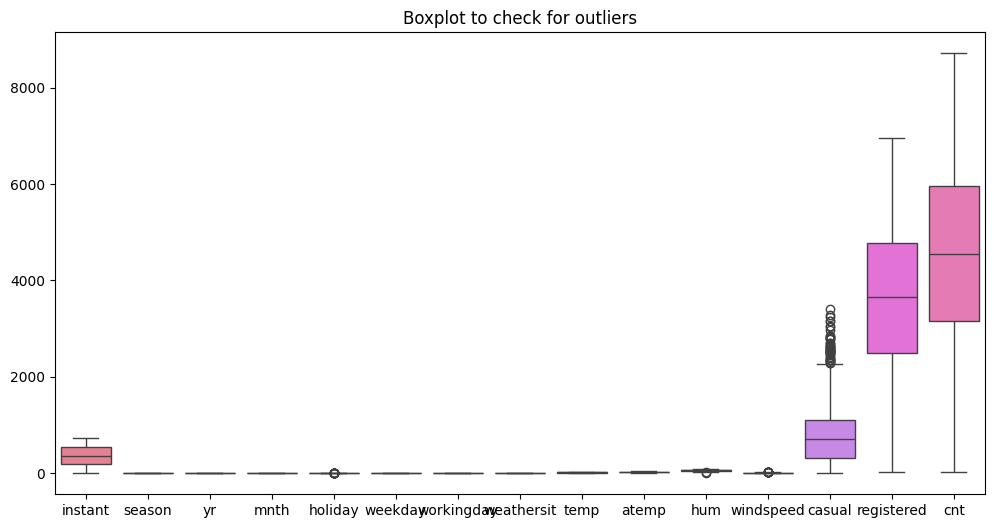

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot to check for outliers')
plt.show()


1. **Outliers Observed**:
   - **Windspeed**: There are multiple outliers in the `windspeed` feature. This means that some of the recorded wind speeds are significantly higher or lower compared to the majority of the data.
   - **Humidity (hum)**: A few minor outliers can be observed here as well.
   - **Casual Users (casual)**: The `casual` users feature shows quite a bit of variability, including some data points that could be considered outliers.
   
2. **Features with No Significant Outliers**:
   - **`temp` and `atemp`** seem to have a fairly uniform distribution without significant outliers.
   - **`registered` and `cnt`** have larger ranges, but their variability seems natural, likely because the number of bike rentals can vary significantly between days.
   
3. **Actionable Steps**:
   - We need to decide how to handle the outliers, particularly for **`windspeed`** and **`casual`**. We can either remove or transform these values to reduce their impact on model building.
   - Outliers might affect the regression model by skewing results, so a careful examination is necessary.

Next, we will proceed with handling these outliers, either by capping them using quantiles or by other transformations, such as log transformation, depending on their impact.